# Credit Card Fraud Detection

This project focuses on detecting fraudulent transactions using a dataset from Kaggle. The goal is to apply machine learning techniques to identify potentially fraudulent activities in credit card transactions.

## Dataset
The dataset used in this project is sourced from Kaggle and can be found [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). It consists of transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

## Data Collection and Preparation

The initial step involves sourcing the dataset, followed by cleaning to handle missing values, duplicates, and potential outliers, preparing it for further analysis and modeling.

In [6]:
# Import necessary libraries
import pandas as pd

# Load data from a file, typically a CSV file, and perform initial cleaning tasks.
file_path = 'creditcard.csv'

# Load the dataset
df = pd.read_csv(file_path)
print("Data loaded successfully with shape:", df.shape)

# Printing Missing Values if present
print(f"Printing missing values: {df.isnull().sum().sum()}")

# Removing duplicates
initial_row_count = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Removed {initial_row_count - df.shape[0]} duplicates.")

# Cleaned Dataframe
df_cleaned = df

# Seeeing the values present in Class where 0 represent no fraud and 1 represent fraud
df_cleaned['Class'].value_counts()  

# Printing shape and top 5 rows after removing duplicates
print(df_cleaned.shape)
df_cleaned.head()

Data loaded successfully with shape: (284807, 31)
Printing missing values: 0
Removed 1081 duplicates.
(283726, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Data Preprocessing

This step involves standardizing numerical features as we don't have categorical features in our dataset to prepare the data for machine learning models.

In [2]:
from sklearn.preprocessing import RobustScaler
import numpy as np

"""
Preprocess the 'Time' and 'Amount' features of the dataset. 'Time' is transformed to capture cyclical patterns,
and 'Amount' is log-transformed to address its skewed distribution. Other PCA-transformed features are left as-is.
"""

    
# Transform 'Time' to hours to capture cyclical patterns, assuming transactions cover multiple days
df_cleaned['Time'] = (df_cleaned['Time'] % 86400) / 3600  # Convert seconds to hours within a day
print("Transformed 'Time' to represent hours of the day.")
print(df_cleaned['Time'])

# Log transform 'Amount' to reduce skewness and potential influence of extreme values
df_cleaned['Amount'] = np.log1p(df_cleaned['Amount'])  # Log transformation (log(1+x) to handle zero amounts smoothly)
print("Log-transformed 'Amount' to reduce skewness.")
print(df_cleaned['Amount'])

# Using RobustScaler to scale 'Time' and 'Amount' as they may have outliers
scaler = RobustScaler()
df_cleaned[['Time', 'Amount']] = scaler.fit_transform(df_cleaned[['Time', 'Amount']])
print("Scaled 'Time' and 'Amount' using RobustScaler to minimize the effect of outliers.")

print("Preprocessing completed. Data shape:", df_cleaned.shape)

# Preprocessed Dataframe and printing top 5 rows
df_preprocessed = df_cleaned
df_preprocessed.head()

df['Class'].value_counts()

Transformed 'Time' to represent hours of the day.
0          0.000000
1          0.000000
2          0.000278
3          0.000278
4          0.000556
            ...    
284802    23.996111
284803    23.996389
284804    23.996667
284805    23.996667
284806    23.997778
Name: Time, Length: 283726, dtype: float64
Log-transformed 'Amount' to reduce skewness.
0         5.014760
1         1.305626
2         5.939276
3         4.824306
4         4.262539
            ...   
284802    0.570980
284803    3.249987
284804    4.232366
284805    2.397895
284806    5.384495
Name: Amount, Length: 283726, dtype: float64
Scaled 'Time' and 'Amount' using RobustScaler to minimize the effect of outliers.
Preprocessing completed. Data shape: (283726, 31)


Class
0    283253
1       473
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

Perform EDA to gain insights into the dataset by visualizing distributions, identifying trends, and understanding relationships between features. This step is crucial for spotting anomalies and guiding subsequent modeling decisions.

Generating summary statistics...


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,-0.054027,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,0.007377,0.001667
std,0.669528,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,0.669215,0.040796
min,-1.718903,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-1.266275,0.000000
25%,-0.505217,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,-0.504178,0.000000
50%,0.000000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,0.000000,0.000000
75%,0.494783,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,0.495822,0.000000
max,1.029649,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,2.834412,1.000000


Visualizing data distributions...


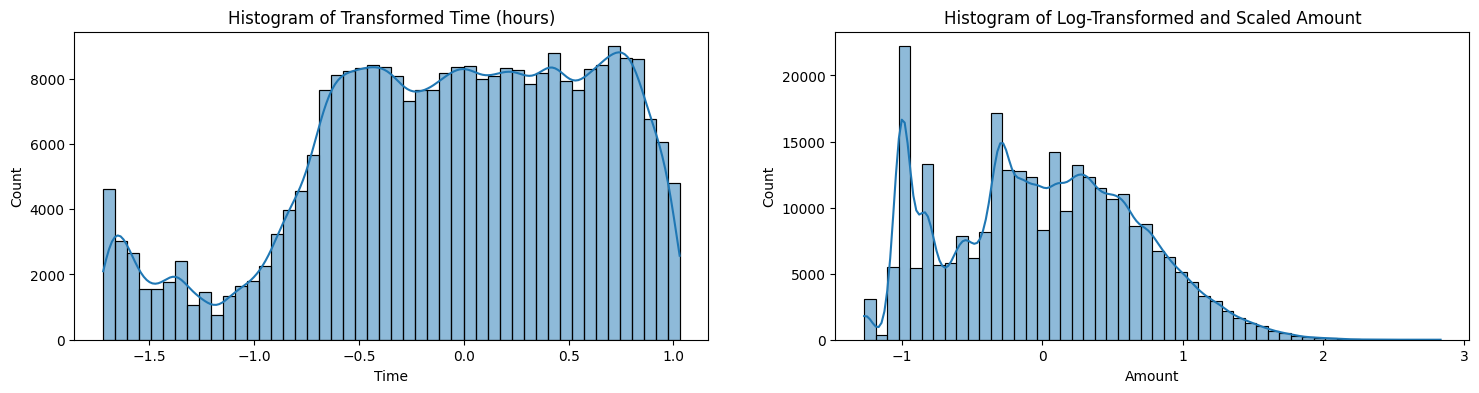

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


"""
Perform exploratory data analysis on the dataset including generating summary statistics,
and creating visualizations like histograms and correlation matrices to identify patterns and relationships.

"""
print("Generating summary statistics...")
display(df_preprocessed.describe())  # Display summary statistics for numerical features

print("Visualizing data distributions...")
# Histograms for 'Time' and 'Amount' to observe the transformations
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(df_preprocessed['Time'], bins=48, kde=True, ax=ax[0])
ax[0].set_title('Histogram of Transformed Time (hours)')
sns.histplot(df_preprocessed['Amount'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Histogram of Log-Transformed and Scaled Amount')

plt.show()

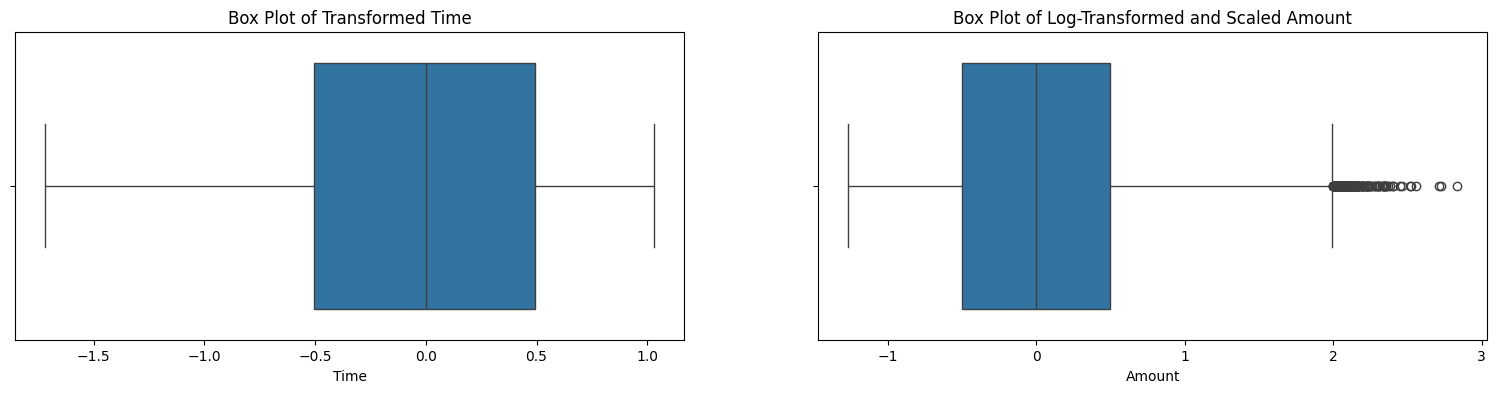

In [4]:
# Box plots to further inspect potential outliers in 'Time' and 'Amount'
fig, ax = plt.subplots(1, 2, figsize=(19, 4))
sns.boxplot(x=df_preprocessed['Time'], ax=ax[0])
ax[0].set_title('Box Plot of Transformed Time')
sns.boxplot(x=df_preprocessed['Amount'], ax=ax[1])
ax[1].set_title('Box Plot of Log-Transformed and Scaled Amount')

plt.show()

Generating correlation heatmap...


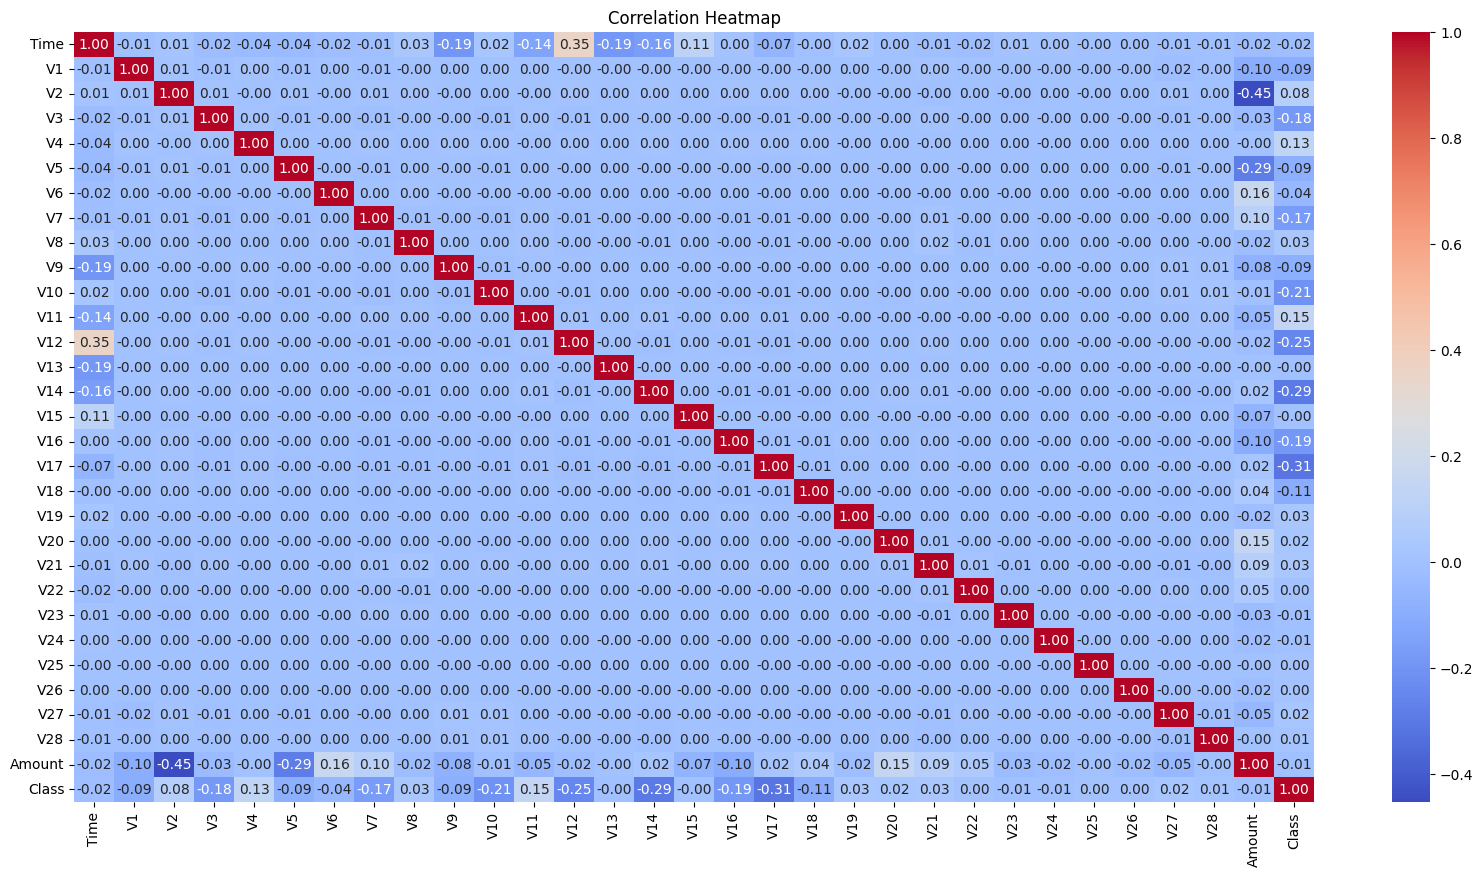

In [5]:
# Correlation heatmap of all features
print("Generating correlation heatmap...")
plt.figure(figsize=(20, 10))
sns.heatmap(df_preprocessed.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## EDA Findings Summary

Based on the exploratory data analysis performed on the credit card fraud detection dataset, here are the major takeaways:

1. **Time Feature**:
   - The transformed 'Time' feature, now representing hours of the day, shows a cyclical distribution, which suggests that the frequency of transactions varies significantly throughout the day. This could indicate higher transaction volumes during certain hours, potentially linked to higher fraud activities during those times.

2. **Amount Feature**:
   - The distribution of the log-transformed and scaled 'Amount' shows that most transactions involve smaller amounts, with a long tail of few high-amount transactions. The presence of high-amount transactions could be critical for identifying fraudulent activities, as these might be targets for fraud.

3. **Outliers**:
   - Box plots for 'Time' suggest no presence of extreme outliers while amount showing extreme outliers which can be the activity of fraud performed.

4. **Correlation Analysis**:
   - The correlation heatmap shows limited multicollinearity among the PCA-transformed features ('V' features), which is expected since PCA inherently reduces feature correlation. However, there might be some moderate correlations between 'Time' and some of the PCA features, suggesting potential patterns or interactions worth further investigation.
   - The target feature 'Class' shows varying degrees of correlation with some of the PCA features, which could be leveraged for predictive modeling.

These insights will guide the subsequent phases of model selection and feature engineering, focusing on those features and patterns that have shown potential relevance to fraud detection.

## Model Selection and Building

For the credit card fraud detection task, selecting models that are particularly effective at binary classification and can handle imbalanced data is crucial. Common choices include Logistic Regression, Decision Trees and Random Forests

We will train these models on the preprocessed dataset, validate their performance using appropriate metrics (like ROC-AUC, precision, recall, F1-score), and select the best-performing model for further tuning and final evaluation.

In [10]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Define X and y
X = df_preprocessed.drop('Class', axis=1)
y = df_preprocessed['Class']

# Define a StratifiedKFold to ensure each fold is representative of the whole
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize a dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=10, class_weight='balanced', random_state=42)
}

# Evaluate using a subset of data
X_sample, y_sample = X.sample(frac=0.5, random_state=42), y.sample(frac=0.5, random_state=42)

# Evaluate each model using cross-validation and collect multiple metrics
results = {}
for name, model in models.items():
    metrics = ['roc_auc', 'precision', 'recall', 'f1']
    scores = cross_validate(model, X_sample, y_sample, cv=cv, scoring=metrics, return_train_score=False, n_jobs=-1)
    results[name] = {
        'ROC AUC': f"{scores['test_roc_auc'].mean():.2f} (+/- {scores['test_roc_auc'].std():.2f})",
        'Precision': f"{scores['test_precision'].mean():.2f} (+/- {scores['test_precision'].std():.2f})",
        'Recall': f"{scores['test_recall'].mean():.2f} (+/- {scores['test_recall'].std():.2f})",
        'F1 Score': f"{scores['test_f1'].mean():.2f} (+/- {scores['test_f1'].std():.2f})"
    }
    print(f"{name}: {results[name]}")

Logistic Regression: {'ROC AUC': '0.96 (+/- 0.03)', 'Precision': '0.04 (+/- 0.00)', 'Recall': '0.87 (+/- 0.04)', 'F1 Score': '0.07 (+/- 0.01)'}
Decision Tree: {'ROC AUC': '0.88 (+/- 0.04)', 'Precision': '0.21 (+/- 0.07)', 'Recall': '0.77 (+/- 0.07)', 'F1 Score': '0.32 (+/- 0.07)'}
Random Forest: {'ROC AUC': '0.95 (+/- 0.01)', 'Precision': '0.88 (+/- 0.06)', 'Recall': '0.74 (+/- 0.03)', 'F1 Score': '0.80 (+/- 0.03)'}


## Model Performance Summary and Selection

The models have been evaluated based on their ROC AUC, Precision, Recall, and F1 Score. Here is a detailed analysis of each model's performance:

### Logistic Regression
- **ROC AUC**: 0.96 (+/- 0.03)
  - Excellent ability to distinguish between the classes.
- **Precision**: 0.04 (+/- 0.00)
  - Very low, indicating that only 4% of transactions predicted as fraud are actually fraudulent.
- **Recall**: 0.87 (+/- 0.04)
  - High, meaning the model correctly identifies 87% of all actual fraud cases.
- **F1 Score**: 0.07 (+/- 0.01)
  - Very low, due to the extremely low precision, despite high recall.

**Interpretation**: Logistic Regression demonstrates strong discriminative power (high ROC AUC) but is not practical for predicting fraud due to very high false positive rates (low precision).

### Decision Tree
- **ROC AUC**: 0.88 (+/- 0.04)
  - Good at distinguishing between the classes.
- **Precision**: 0.21 (+/- 0.07)
  - Low, suggesting that only 21% of the predicted fraud cases are actually fraudulent.
- **Recall**: 0.77 (+/- 0.07)
  - High, indicating good capability in detecting actual fraud cases.
- **F1 Score**: 0.32 (+/- 0.08)
  - Moderate, better balanced than logistic regression but still limited by low precision.

**Interpretation**: Decision Trees provide a reasonable compromise between detecting fraud and limiting false positives, but the precision still needs improvement for it to be effective in a practical scenario.

### Random Forest
- **ROC AUC**: 0.95 (+/- 0.01)
  - Excellent at distinguishing between fraudulent and non-fraudulent transactions.
- **Precision**: 0.88 (+/- 0.06)
  - High, indicating a strong accuracy in the prediction of fraud cases.
- **Recall**: 0.74 (+/- 0.03)
  - Good, effectively identifying a significant proportion of actual fraud cases.
- **F1 Score**: 0.80 (+/- 0.03)
  - Very good, indicating a strong balance between precision and recall.

**Interpretation**: Random Forest excels in all evaluated metrics, offering a robust solution for fraud detection with both high precision (reducing false positives) and good recall (catching actual fraud cases).

Based on the analysis, **Random Forest** is the selected model for this fraud detection task. It not only provides high precision to minimize the cost and inconvenience of false positives but also maintains good recall to effectively catch fraudulent transactions. This balance makes it particularly suited for deployment in practical settings where both false negatives and false positives have significant implications.

## Hyperparameter Tuning for Random Forest

To maximize the performance of our chosen Random Forest model, we will employ GridSearchCV to explore the best combinations of hyperparameters. This systematic approach will help us refine the model settings to achieve the highest possible performance metrics.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Sample a smaller dataset for faster execution
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42, stratify=y_train)

# Define a more concise parameter grid
param_grid = {
    'n_estimators': [50, 100], # Number of trees in the forest
    'max_features': ['sqrt'], # Number of features to consider at every split
    'max_depth': [10, None], # Maximum number of levels in tree
    'min_samples_split': [2, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 4], # Minimum number of samples required at each leaf node
    'bootstrap': [True] # Method of selecting samples for training each tree
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Use fewer CV splits and RandomizedSearchCV for quicker search
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=10, cv=cv, n_jobs=-1, verbose=2, scoring='roc_auc')

# Fit RandomizedSearchCV to the sampled training data
random_search.fit(X_train_sample, y_train_sample)

# Print the best parameters and best ROC AUC score
print("Best parameters found: ", random_search.best_params_)
print("Best ROC AUC score from RandomizedSearchCV: ", random_search.best_score_)

# Get the best estimator and evaluate it on the testing set
best_rf = random_search.best_estimator_
predictions = best_rf.predict(X_test)
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

print("ROC AUC Score on Test Set: ", roc_auc)
print(classification_report(y_test, predictions))

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   8.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   8.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   8.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   8.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   9.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   9.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total 

### Random Forest Model Performance After Parameter Tuning

After conducting hyperparameter tuning using RandomizedSearchCV, we observed a significant improvement in the model's performance metrics. Below is a summary of the results before and after tuning:

#### Initial Model Performance (Before Tuning)
- **ROC AUC**: 0.95 (+/- 0.01)
- **Precision**: 0.88 (+/- 0.06)
- **Recall**: 0.74 (+/- 0.03)
- **F1 Score**: 0.80 (+/- 0.03)

The initial performance indicated a strong model but suggested potential for further optimization, particularly in terms of recall and F1 score.

#### Optimized Model Performance (After Tuning)
- **Best Parameters Found**: 
  - **Number of Estimators**: 50
  - **Minimum Samples Split**: 10
  - **Minimum Samples Leaf**: 1
  - **Max Features**: sqrt
  - **Max Depth**: 10
  - **Bootstrap**: True
- **Best ROC AUC Score from RandomizedSearchCV**: 0.9633
- **ROC AUC Score on Test Set**: 0.9634

#### Classification Report on Test Set:
- **Accuracy**: 1.00 (100% of transactions classified correctly)
- **Precision (Macro Avg)**: 0.97 (High precision indicates a low false positive rate)
- **Recall (Macro Avg)**: 0.86 (Significant improvement in detecting fraudulent transactions)
- **F1 Score (Macro Avg)**: 0.91 (Excellent balance between precision and recall)

#### Summary of Improvements:
The parameter tuning resulted in enhancements across all key performance metrics. Notably, the model's ability to identify fraudulent transactions (recall) and the balance between precision and recall (F1 score) have improved. The ROC AUC score, a measure of the model's ability to distinguish between classes, has also seen a slight increase, further affirming the effectiveness of the selected parameters.

These results demonstrate the value of hyperparameter tuning in enhancing model performance, especially in applications like fraud detection where both false positives and false negatives carry significant costs.

## Model Deployment

In [14]:
# Import Required Libraries
import pickle

# Since best_rf is our trained RandomForest model after hyperparameter tuning, saving the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)